1. Original MNIST Dataset을 SVC 모델로 train 진행 후 score / score : 97.92

In [57]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint64)
X_train_origin, X_valid_origin, y_train_origin, y_valid_origin = X[:60000], X[60000:], y[:60000], y[60000:]

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_origin, y_train_origin)
svm_clf.score(X_valid_origin, y_valid_origin)

c:\Users\hyok1\anaconda3\envs\terry2\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(60000, 784)

2. 새로 만든 100개의 Handmade Test Dataset을 test 하여 score / score : 0.1

In [56]:
handmade_test_100 = np.load('handmade_test_100.npz')
# x와 y에 데이터 할당
X_new = handmade_test_100['img']
y_new = handmade_test_100['label']
# x의 shape 수정
batchsize=X_new.shape[0]
inputdim=X_new.shape[1]*X_new.shape[2]
X_new=np.reshape(X_new,(batchsize,inputdim))
print(svm_clf.score(X_new, y_new))
print(svm_clf.predict(X_new))


(100, 784)

2-1. Original dataset의 scale이 0-255, Handmade dataset의 scale이 0-1 임을 확인 후 scale 맞추고 다시 train 후 score / score :  

In [4]:
print(X_train_origin[0])
print(X_new[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [5]:
X = X / 255.0
X_train_origin, X_valid_origin, y_train_origin, y_valid_origin = X[:60000], X[60000:], y[:60000], y[60000:]
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_origin, y_train_origin)
print(svm_clf.score(X_new, y_new))
print(svm_clf.predict(X_new))


0.28
[2 2 5 4 6 6 5 5 5 4 6 1 5 5 2 5 6 5 6 4 5 1 5 5 5 8 5 2 8 5 9 1 4 9 5 9 5
 5 5 5 0 7 2 3 7 9 6 7 3 5 6 7 7 7 4 7 2 7 7 7 7 1 2 4 9 7 1 5 5 9 5 1 2 3
 5 5 5 2 3 5 5 1 5 3 4 5 5 7 3 5 5 1 2 5 4 9 5 5 5 5]


In [1]:
import numpy as np
import pandas as pd

# mnist_test.npz 파일 로드
mnist_handdata = np.load('digit_data_TrVal-1.npz')

# 이미지 데이터를 2차원 배열로 변환
img_reshaped = mnist_handdata['img'].reshape(mnist_handdata['img'].shape[0], -1)

# DataFrame 생성
df = pd.DataFrame(img_reshaped)

# label 컬럼 추가
df['label'] = mnist_handdata['label']

print(df)


         0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15115  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15118  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

       778  779  780  781  782  783  label  
0     

         0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
15114  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15115  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15116  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15117  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15118  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

       778  779  780  781  782  783  label  
0     

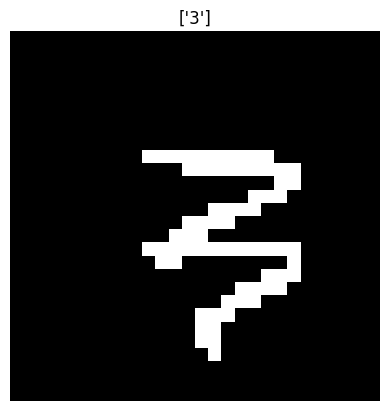

In [21]:
import matplotlib.pyplot as plt
operation=['+','-','x','/','=']
# Find all the indices of incorrect labels in 'label' column
op_indices = []
for op in operation:
    indices = df.index[df['label'] == op].tolist()
    op_indices.extend(indices)
# Delete rows with incorrect labels
df = df[~df.index.isin(op_indices)]
print(df)

img = df.iloc[df.index == 5, :784].values
image = img.reshape(28, 28)
label = df.iloc[df.index == 5]['label'].values
# 이미지 시각화
plt.imshow(image, cmap='gray')
plt.title(label)
plt.axis('off')
plt.show()

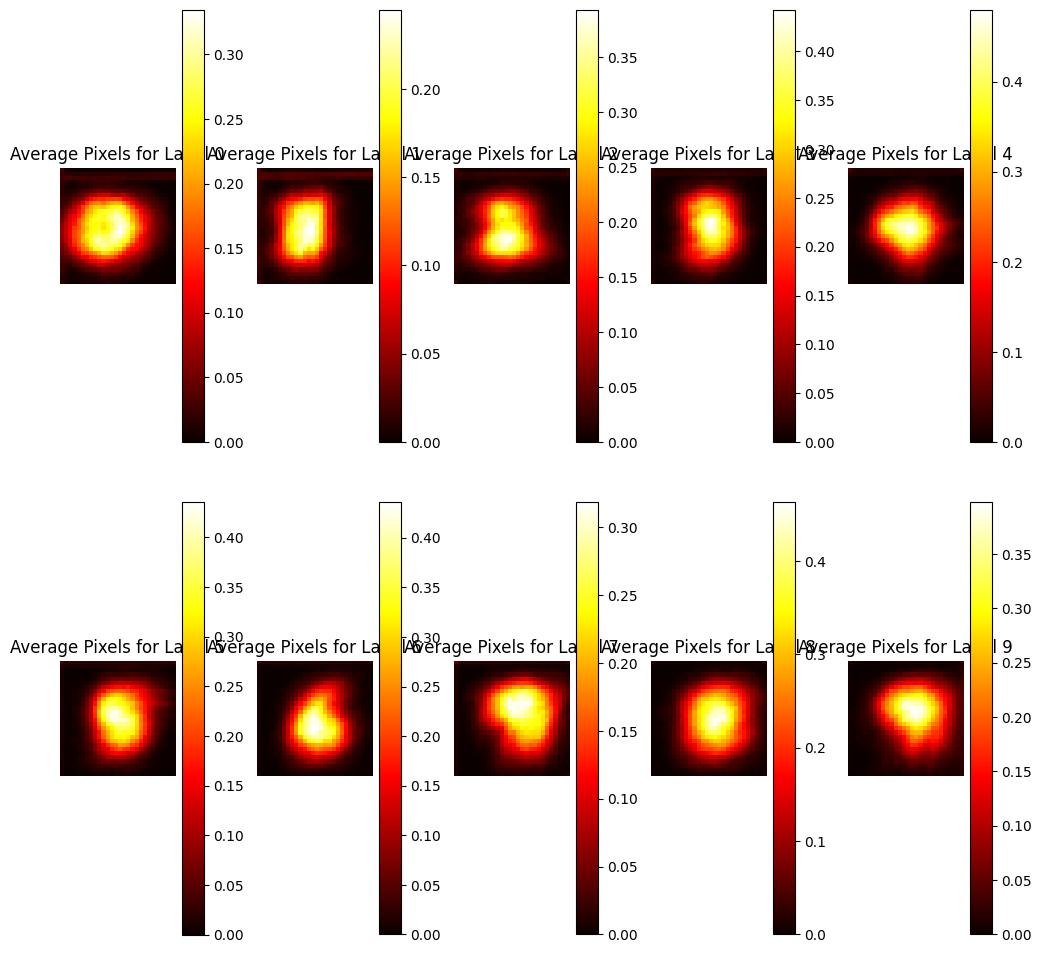

In [4]:

# 레이블 0부터 9까지 이미지들의 평균 계산 및 시각화
plt.figure(figsize=(10, 10))
for i in range(10):
    label_images = df[df['label'] == str(i)].iloc[:, :784].values
    reshaped_data = label_images.reshape(-1, 28, 28)  # Reshaping the data to (28, 28) shape
    pixel_mean = np.mean(label_images, axis=0)  # 이미지들의 평균 계산
    pixel_mean_reshaped = pixel_mean.reshape(28, 28)  # 이미지의 평균값을 28x28로 변경
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(pixel_mean_reshaped, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Average Pixels for Label {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.svm import SVC

# 이미지를 중앙에 맞추는 함수 정의
def center_and_filter_image(df, b):
    images = df.iloc[:, :784].values.reshape(-1, 28, 28)
    labels = df['label'].values
    x_train_centered = []
    y_train_centered = []
    deleted_indices = []

    for index, image in enumerate(images):
        threshold = (image > 0)
        coords = np.argwhere(threshold)

        if len(coords) > 0:
            top_coord = coords[coords[:, 0].argmin()]
            bottom_coord = coords[coords[:, 0].argmax()]
            left_coord = coords[coords[:, 1].argmin()]
            right_coord = coords[coords[:, 1].argmax()]

            x_min = min(top_coord[0], bottom_coord[0]) + b
            x_max = max(top_coord[0], bottom_coord[0]) + b
            y_min = min(left_coord[1], right_coord[1]) + b
            y_max = max(left_coord[1], right_coord[1]) + b

            centered_image = image[x_min:x_max + 1, y_min:y_max + 1]

            final_image = np.zeros((28, 28))
            start_x = (28 - centered_image.shape[0]) // 2
            start_y = (28 - centered_image.shape[1]) // 2
            final_image[start_x:start_x + centered_image.shape[0],
                        start_y:start_y + centered_image.shape[1]] = centered_image

            x_train_centered.append(final_image)
            y_train_centered.append(labels[index])
        else:
            deleted_indices.append(index)

    x_train_centered = np.array(x_train_centered)
    y_train_centered = np.array(y_train_centered)

    # Create a new DataFrame with the centered images and labels
    df_centered = pd.DataFrame(x_train_centered.reshape(len(x_train_centered), -1))
    df_centered['label'] = y_train_centered

    return df_centered


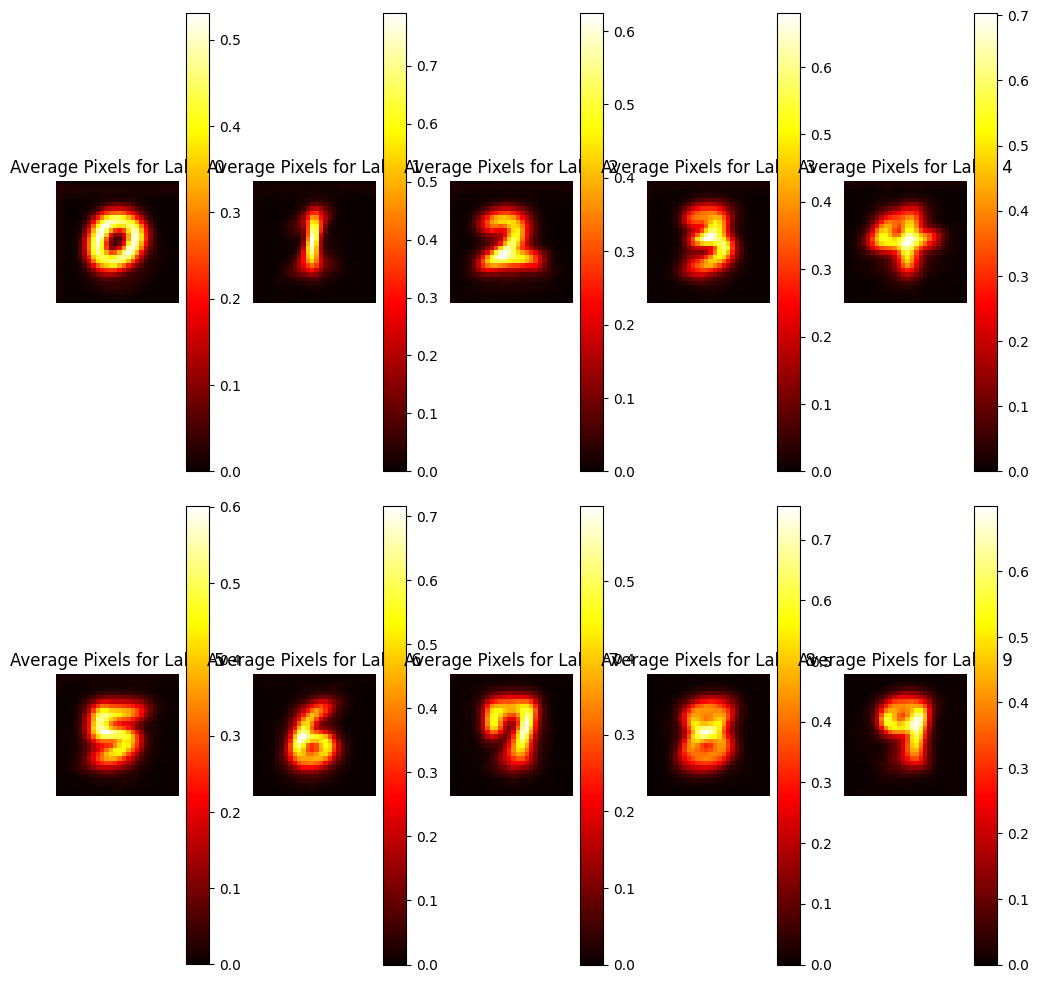

In [6]:
df_centered0 = center_and_filter_image(df,0)
# 레이블 0부터 9까지 이미지들의 평균 계산 및 시각화
plt.figure(figsize=(10, 10))
for i in range(10):
    label_images = df_centered0[df_centered0['label'] == str(i)].iloc[:, :784].values
    reshaped_data = label_images.reshape(-1, 28, 28)  # Reshaping the data to (28, 28) shape
    pixel_mean = np.mean(label_images, axis=0)  # 이미지들의 평균 계산
    pixel_mean_reshaped = pixel_mean.reshape(28, 28)  # 이미지의 평균값을 28x28로 변경
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(pixel_mean_reshaped, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Average Pixels for Label {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

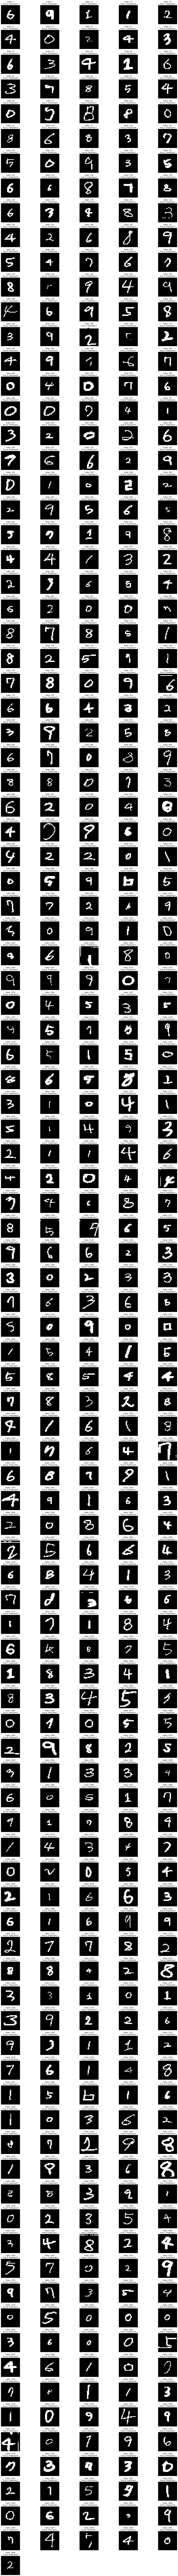

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train_new_digit = df_centered0.iloc[:, :784].values
y_train_new_digit = df_centered0['label'].values
# Validation 세트 분할
x_train, x_valid, y_train, y_valid = train_test_split(x_train_new_digit, y_train_new_digit, test_size=0.2, random_state=42)


svc_clf = SVC(random_state=42)
x_train = x_train.reshape(len(x_train), -1)
x_valid = x_valid.reshape(len(x_valid),-1)
svc_clf.fit(x_train,y_train)
# Validation 세트로 성능 검증
# 잘못 분류된 이미지 찾기
misclassified_idx = svc_clf.predict(x_train_new_digit)!= y_train_new_digit

# 잘못 분류된 이미지 시각화
plt.figure(figsize=(20, 260))
num_images = len(misclassified_idx)
rows = (num_images // 5) + 1 if num_images % 5 != 0 else num_images // 5

for i, idx in enumerate(misclassified_idx):
    plt.subplot(rows, 5, i + 1)
    plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Index: {idx}\nTrue:{y_valid[idx]}, Predicted:{svc_clf.predict(x_valid[idx].reshape(1, -1))[0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



In [90]:
# Delete miss labled
miss_labeled_indices = [81,336,378,552,819,862,893,1005,1229,1279,1773,1887,2057,2145,2192,2221,2429,2360,2523,
2542,2592,2614,2824,2966,3127,3153,3230,3359,3405,4042,4369,4587,4670,4742,4761
,4885,5041,5313,5450,5499,5655,5823,6069,6102,6113,6330,6481,6548,6819,7025,
7163,7452,7702,7772,7866,7981,8120,8191,8318,8472,8493,8636,8905,8977,9212,9278,9307,9361,9645,9715,
9832,9929,9990,10038,10095,10151,10217,10773,10798,10816,11005,11083,11188,11444,
11510,11546,11662,11886,11921,12184,12239,12477,12718,12763,12866,13023,13084,
13128,13220,13261,13582,13732,18,162,249,340,673,825,876,1126,1194,1290,1334,1584,1622,
1942,2162,2194,2239,2338,2390,2596,2665,2729,2769,2863,2928,2998,3128,3290,3374,3406,
3481,3529,3697,3737,3839,3918,3993,4043,4121,4324,4393,4454,4539,4599,4624,4645,4684,4789,4832,
4905,4988,5130,5259,5314,5366,5452,5503,5620,5795,5844,5976,6026,6084,6280,6332,6490,6556,6441,
6785,6822,6965,7051,7183,7586,7709,7787,7826,7871,8030,8262,8372,8473,8554,8623,8908,8996,9159,9230,9283,
9372,9671,9723,9833,9933,9980,10053,10309,10384,10556,10801,11009,11206,11247,11280,11393,11571,11619,11694,
11927,11990,12020,12080,12196,12479,12634,12767,12867,12972,13134,13241,13308,13347,
13397,13453,13697,165,116,464,510,605,675,726,877,900,936,1253,1303,1395,1591,
1804,1923,1964,2116,2452,2618,2735,2830,3012,3081,3133,3291,3483,3540,3616,3640,3738,
3848,3897,3922,3996,4050,4089,4408,4469,4556,4607,4629,4721,4872,5075,5196,5239,5326,5509,5567,5670,
5800,5913,6031,6088,6236,6432,6498,6710,6793,6832,6931,6979,7038,7061,7123,7409,7456,
7598,7685,7729,7750,7796,7928,8053,8098,8150,8383,8480,8525,8611,8625,8660,
8913,9112,9286,9320,9496,9576,9620,9680,9727,10006,10160,10279,10405,1520,10727,10790,10805,10842,10880,10993,
11049,11146,11213,11268,11294,11345,11462,11496,11646,12005,12081,12210,12399,
12451,12640,12987,13044,13115,13245,13309,13349,13459,13492,13698,13746,
41,348,369,419,512,677,744,784,855,887,949,989,1068,1221,1261,1319,1550,1594,1652,
1878,1924,2013,2045,2212,2270,2509,2537,2689,2471,2885,3044,3334,3385,3437,3667,3819,
3923,3964,4094,4146,4474,4516,4736,4797,4931,5339,5471,5585,5682,5803,5857,5955,6032,6151,6250,6305,6369,6521,
6662,6711,6773,6801,6932,7148,7324,7734,7755,7797,7915,7943,8065,8151,8177,8280,8388,8485,8529,8614,8689,8729,9071,9136,9586,9628,9709,9728,
9759,9856,9903,9967,10138,10165,10329,10375,10431,10535,10561,10650,10739,10792,10810,10896,10962,11091,11158,11362,11499,11583,11966,12053,12284,12405,
12523,12578,12809,13012,13073,13163,13255,13429,13471,13499,13703,
58,191,329,359,434,543,812,861,892,991,1017,1270,1329,1354,1400,1601,1835,1978,2219,2309,2352,2539,2580,
2743,2846,3093,3341,3395,3508,3678,3730,3751,3821,3878,3985,4011,4077,4448,4524,4665,4706,4759,4801,4878,5092,5206,5256,5282,5381,5482,5608,5654,
5698,5737,5872,6047,6090,6254,6313,6400,6473,6615,6678,6776,6901,6933,7019,7041,7423,7517,7694,7735,7766,7836,8160,
8181,8311,8406,8633,8695,8936,9298,9344,9407,9558,9603,9712,9734,9777,9830,9989,10032,10090,10237,10296,10340,10377,10486,10682,40741,10793,10815,10854,
10974,11037,11093,11163,11227,11309,11442,11470,11508,11541,11655,11831,11861,11915,11975,12008,12068,12162,12373,
12525,12701,12849,12880,13124,13258,13328,13385,13439,13521,13568,13683,4077]
# 하나로 펼치기

unique_indices_train = list(set(miss_labeled_indices))

# 중복 제거된 인덱스를 사용하여 X 및 y 수정
df = df[~df.index.isin(unique_indices_train)]

df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


(41397, 785)


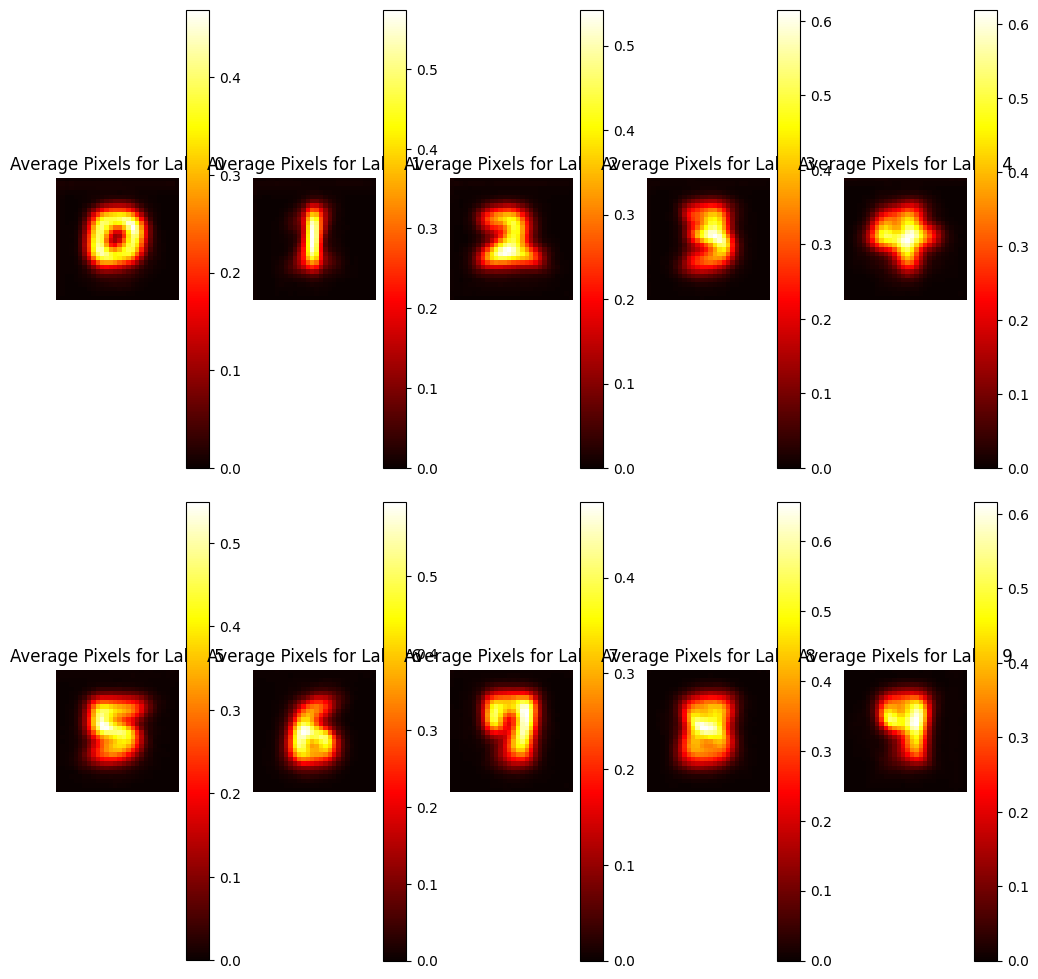

In [80]:
import matplotlib.pyplot as plt

df_centered1 = center_and_filter_image(df,1)
df_centered2 = center_and_filter_image(df,0)
df_centered3 = center_and_filter_image(df,-1)


# Assume df_centered1, df_centered2, df_centered3 are obtained from previous calls
# Concatenate the DataFrames
df_augumentation = pd.concat([df_centered1, df_centered2, df_centered3], ignore_index=True)

# Check the shape of the concatenated DataFrame
print(df_augumentation.shape)
import matplotlib.pyplot as plt
# Extracting columns from 0 to 783 for the rows 13801 and 785

# 레이블 0부터 9까지 이미지들의 평균 계산 및 시각화
plt.figure(figsize=(10, 10))
for i in range(10):
    label_images = df_augumentation[df_augumentation['label'] == str(i)].iloc[:, :784].values
    reshaped_data = label_images.reshape(-1, 28, 28)  # Reshaping the data to (28, 28) shape
    pixel_mean = np.mean(label_images, axis=0)  # 이미지들의 평균 계산
    pixel_mean_reshaped = pixel_mean.reshape(28, 28)  # 이미지의 평균값을 28x28로 변경
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(pixel_mean_reshaped, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Average Pixels for Label {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [82]:
from sklearn.model_selection import train_test_split
x_train_new_digit = df_augumentation.iloc[:, :784].values
y_train_new_digit = df_augumentation['label'].values
# Validation 세트 분할
x_train, x_valid, y_train, y_valid = train_test_split(x_train_new_digit, y_train_new_digit, test_size=0.1, random_state=42)
# SVC 모델 학습

7. Test Validation 나누고 svm 모델에 train 진행 후 score / validation score : 83%

In [58]:

svc_clf = SVC(random_state=42)
x_train = x_train.reshape(len(x_train), -1)
svc_clf.fit(x_train, y_train)
x_valid = x_valid.reshape(len(x_valid),-1)
# Validation 세트로 성능 검증
accuracy = svc_clf.score(x_valid, y_valid)
print(f"Validation Accuracy: {accuracy}")
print(x_train_new_digit.shape)



Validation Accuracy: 0.8214975845410628
(41397, 784)


In [59]:
accuracy = svc_clf.score(x_train, y_train)
print(f"Train Accuracy: {accuracy}")

Validation Accuracy: 0.8801030678798615


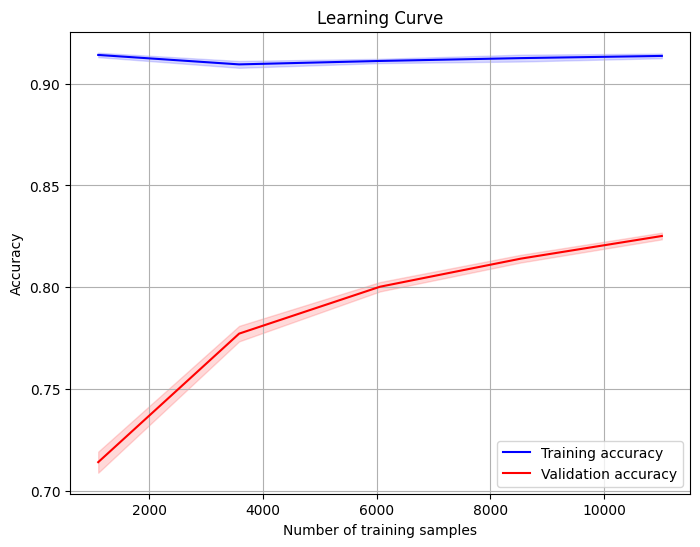

In [194]:
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer


train_sizes, train_errors, test_errors = learning_curve(
    SVC(random_state=42), x_train_new_digit.reshape(len(x_train_new_digit), -1), y_train_new_digit, 
    cv=5, scoring=make_scorer(zero_one_loss, greater_is_better=False))

train_errors_mean = np.mean(train_errors, axis=1)
train_errors_std = np.std(train_errors, axis=1)
test_errors_mean = np.mean(test_errors, axis=1)
test_errors_std = np.std(test_errors, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors_mean, label='Training error', color='blue')
plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_errors_mean, label='Validation error', color='red')
plt.fill_between(train_sizes, test_errors_mean - test_errors_std, test_errors_mean + test_errors_std, alpha=0.15, color='red')

plt.title('Learning Curve: Error')
plt.xlabel('Number of training samples')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


In [ ]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

8. MLP 모델에 solver = 'sgd' 일 때 train 진행 후 score / score : 

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# 다층 퍼셉트론(MLP) 분류기 생성 및 훈련
mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42, learning_rate_init=0.1)
mlp.fit(x_train, y_train)

# 모델 정확도 확인
accuracy = accuracy_score(y_valid, mlp.predict(x_valid))
print(f"Valid Accuracy: {accuracy}")



Iteration 1, loss = 1.18484118
Iteration 2, loss = 0.78124318
Iteration 3, loss = 0.66000161
Iteration 4, loss = 0.58419627
Iteration 5, loss = 0.52740040
Iteration 6, loss = 0.48145535
Iteration 7, loss = 0.44289093
Iteration 8, loss = 0.40566010
Iteration 9, loss = 0.37980806
Iteration 10, loss = 0.35130185
Iteration 11, loss = 0.32996891
Iteration 12, loss = 0.30859174
Iteration 13, loss = 0.28735031
Iteration 14, loss = 0.27078112
Iteration 15, loss = 0.25622733
Iteration 16, loss = 0.23873088
Iteration 17, loss = 0.22715077
Iteration 18, loss = 0.21237251
Iteration 19, loss = 0.19953168
Iteration 20, loss = 0.18796966
Iteration 21, loss = 0.18050419
Iteration 22, loss = 0.17400796
Iteration 23, loss = 0.15891109
Iteration 24, loss = 0.14885538
Iteration 25, loss = 0.14520812
Iteration 26, loss = 0.13870004
Iteration 27, loss = 0.13163483
Iteration 28, loss = 0.12461855
Iteration 29, loss = 0.11928102
Iteration 30, loss = 0.11509182
Iteration 31, loss = 0.10974426
Iteration 32, los

c:\Users\hyok1\anaconda3\envs\terry2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
train_errors = []
val_errors = []

for i in range(1, 50):
    mlp.fit(x_train, y_train)
    y_train_pred = mlp.predict(x_train)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

    y_val_pred = mlp.predict(x_valid)
    val_errors.append(1 - accuracy_score(y_valid, y_val_pred))

plt.plot(range(1, 51), train_errors, label='Train')
plt.plot(range(1, 51), val_errors, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

9. MLP 모델에 solver = 'Adam' 일 때 train 진행 후 score / score : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# 다층 퍼셉트론(MLP) 분류기 생성 및 훈련
mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=50, alpha=1e-4,
                    solver='adam', verbose=10, random_state=42, learning_rate_init=0.01)
mlp.fit(x_train, y_train)

# 모델 정확도 확인
accuracy = accuracy_score(y_valid, mlp.predict(x_valid))
print(f"Valid Accuracy: {accuracy}")



